In [4]:
import pandas_datareader as pdr
import pandas as pd
key=""


In [7]:
file_path = "../scripts/data/PFL.csv"
df = pd.read_csv(file_path)

In [8]:
df.head()

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status
0,2013-06-18,98.0,97.0,96.0,96.0,NaN,20.0,1930.0,0
1,2013-07-01,96.0,95.0,92.0,92.0,-4.17,132.0,12316.0,0
2,2013-07-17,92.0,91.0,91.0,91.0,-1.09,60.0,5460.0,0
3,2013-08-01,91.0,92.0,92.0,92.0,1.10,50.0,4600.0,0
4,2013-08-07,92.0,93.0,93.0,93.0,1.09,202.0,18786.0,0


In [9]:
df.tail()

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status
2028,2024-03-03,354.0,356.0,347.0,352.0,-0.56,9659.0,3381456.8,-1
2029,2024-03-04,359.0,373.4,359.0,373.4,6.08,30.0,10985.0,1
2030,2024-03-05,380.8,380.8,358.1,358.1,-4.10,8627.0,3178817.5,-1
2031,2024-03-06,365.2,369.9,353.4,365.8,2.15,8356.0,2992495.2,1
2032,2024-03-07,373.1,376.7,363.6,364.0,-0.49,5524.0,2018670.9,-1


In [10]:
df1=df.reset_index()['close']

In [11]:
df1

0        96.0
1        92.0
2        91.0
3        92.0
4        93.0
        ...  
2028    352.0
2029    373.4
2030    358.1
2031    365.8
2032    364.0
Name: close, Length: 2033, dtype: float64

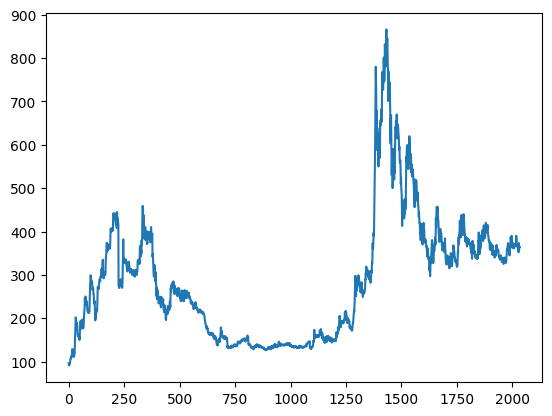

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)


[[0.00645161]
 [0.00129032]
 [0.        ]
 ...
 [0.34464516]
 [0.35458065]
 [0.35225806]]


In [16]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size


(1321, 712)

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)


(1220, 100)
(1220,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)


(611, 100)
(611,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2024-08-23 08:56:44.807106: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-23 08:56:46.430237: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-23 08:56:49.450858: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-23 08:57:01.623524: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/home/zyrex/Documents/programming/walletwise-stocks/wwvenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 876ms/step - loss: 0.0116 - val_loss: 0.0045
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 716ms/step - loss: 0.0019 - val_loss: 0.0042
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 696ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 698ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 707ms/step - loss: 8.4291e-04 - val_loss: 0.0022
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 698ms/step - loss: 7.3671e-04 - val_loss: 0.0018
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 699ms/step - loss: 6.6997e-04 - val_loss: 0.0021
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 697ms/step - loss: 6.1682e-04 - val_loss: 0.0015
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 706ms/step - loss: 5.0915e-04 - val_loss: 0.0021
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 705ms/step - loss: 5.4463e-04 - val_loss: 0.0021
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 710ms/step - loss: 5.0382e-04 - val_loss: 0.0049
Ep

In [27]:
import tensorflow as tf


In [28]:
tf.__version__


'2.16.1'

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

229.5135906456389

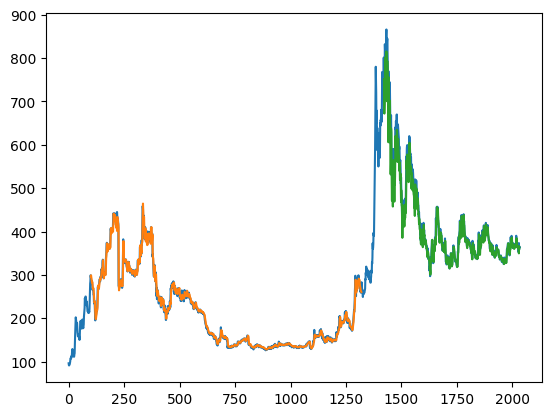

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [49]:
 len(test_data)


712

In [50]:
x_input=test_data[612:].reshape(1,-1)
x_input.shape

(1, 100)

In [51]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [57]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.31522581 0.31870968 0.32516129 0.32645161 0.32       0.32748387
 0.31870968 0.32258065 0.31754839 0.3083871  0.3123871  0.30967742
 0.3123871  0.30967742 0.31870968 0.31483871 0.31870968 0.30206452
 0.30322581 0.30451613 0.32129032 0.31290323 0.31251613 0.31612903
 0.30967742 0.31741935 0.3116129  0.30529032 0.30580645 0.3083871
 0.32516129 0.32722581 0.34645161 0.34709677 0.34967742 0.35419355
 0.36116129 0.36387097 0.364      0.34748387 0.34       0.34451613
 0.3403871  0.33935484 0.32774194 0.34709677 0.34709677 0.34709677
 0.36       0.38193548 0.37290323 0.36541935 0.37290323 0.38580645
 0.36903226 0.36       0.36       0.35096774 0.35741935 0.35096774
 0.35341935 0.36387097 0.35987097 0.35729032 0.3483871  0.35341935
 0.35806452 0.36       0.35870968 0.35677419 0.35806452 0.3563871
 0.36258065 0.35483871 0.38606452 0.37677419 0.35883871 0.36
 0.35354839 0.35393548 0.356      0.35664516 0.35483871 0.35354839
 0.33935484 0.33677419 0.3643871  0.34464516 0.35458065 0.

In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [54]:
import matplotlib.pyplot as plt


In [55]:
len(df1)


2033

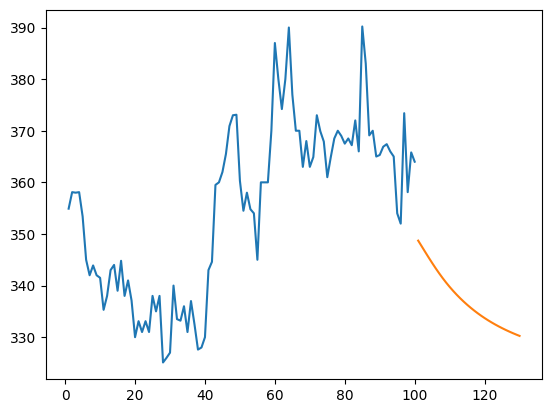

In [58]:
plt.plot(day_new, scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred, scaler.inverse_transform(np.array(lst_output))) 

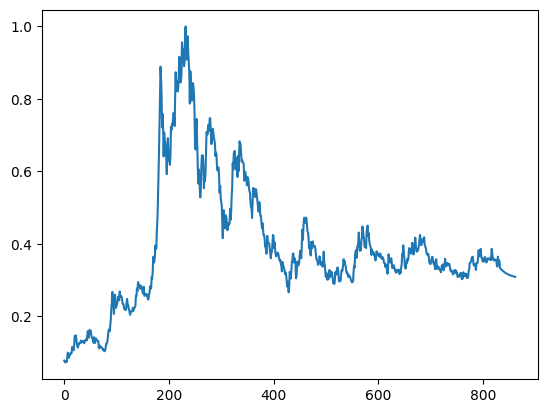

In [59]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])